In [72]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import geopandas as gp
import ast
from cStringIO import StringIO
import os
import json
import requests
import urllib2
import urllib
import shapely
import zipfile
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
import scipy.cluster as scp

# Using the last development version of geopandas at this time
# pip install git+git://github.com/geopandas/geopandas.git
from geopandas import GeoDataFrame

from fiona.crs import from_epsg
import matplotlib.pylab as plt
from matplotlib import colors

%matplotlib inline

PUIDATA=os.getenv('PUIDATA')
path = os.getenv('PUIDATA')+'/'

In [ ]:
#download the datasets

#!for ((y=93; y<=99; y+=1)); do wget ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp$y\totals.zip; done

#!for ((y=0; y<=1; y+=1)); do wget ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp0$y\totals.zip; done

#!for ((y=2; y<=9; y+=1)); do wget ftp://ftp.census.gov/econ200$y\/CBP_CSV/zbp0$y\totals.zip; done

#!for ((y=10; y<=15; y+=1)); do wget ftp://ftp.census.gov/econ20$y\/CBP_CSV/zbp$y\totals.zip; done

--2016-12-12 22:02:16--  ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp93totals.zip
           => “zbp93totals.zip”
Resolving ftp.census.gov... 148.129.75.35, 2610:20:2010:a09:1000:0:9481:4b23
Connecting to ftp.census.gov|148.129.75.35|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /Econ2001_And_Earlier/CBP_CSV ... done.
==> SIZE zbp93totals.zip ... done.
==> PASV ... done.    ==> RETR zbp93totals.zip ... 
No such file “zbp93totals.zip”.

--2016-12-12 22:02:16--  ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp94totals.zip
           => “zbp94totals.zip”
Resolving ftp.census.gov... 148.129.75.35, 2610:20:2010:a09:1000:0:9481:4b23
Connecting to ftp.census.gov|148.129.75.35|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /Econ2001_And_Earlier/CBP_CSV ... done.
==> SIZE zbp94totals.zip ... 611524
==> PASV ... don

In [5]:
#move them to PUIDATA

#!mv *.zip $PUIDATA

In [6]:
#Check if it's there
#!ls $PUIDATA

In [21]:
#Explore columns across files. 
for i in np.arange(0,15):
    if i < 10:
        set = '0' + str(i)
    else:
        set = str(i)
    fname = "zbp" + set + "totals.zip"
    zf = zipfile.ZipFile(path + fname)
    df = pd.read_csv(zf.open(fname.replace('.zip','.txt')))
    print(df.columns)
for i in np.arange(94,100):
    if i < 10:
        set = '0' + str(i)
    else:
        set = str(i)
    fname = "zbp" + set + "totals.zip"
    zf = zipfile.ZipFile(path + fname)
    df = pd.read_csv(zf.open(fname.replace('.zip','.txt')))
    print(df.columns)

Index([u'ZIP', u'NAME', u'EMPFLAG', u'EMP', u'QP1', u'AP', u'EST'], dtype='object')
Index([u'ZIP', u'NAME', u'EMPFLAG', u'EMP', u'QP1', u'AP', u'EST'], dtype='object')
Index([u'ZIP', u'NAME', u'EMPFLAG', u'EMP', u'QP1', u'AP', u'EST'], dtype='object')
Index([u'zip', u'name', u'empflag', u'emp', u'qp1', u'ap', u'est'], dtype='object')
Index([u'zip', u'name', u'empflag', u'emp', u'qp1', u'ap', u'est'], dtype='object')
Index([u'zip', u'name', u'empflag', u'emp', u'qp1', u'ap', u'est'], dtype='object')
Index([u'zip', u'name', u'empflag', u'emp', u'qp1', u'ap', u'est'], dtype='object')
Index([u'zip', u'name', u'empflag', u'emp_nf', u'emp', u'qp1_nf', u'qp1',
       u'ap_nf', u'ap', u'est'],
      dtype='object')
Index([u'zip', u'name', u'empflag', u'emp_nf', u'emp', u'qp1_nf', u'qp1',
       u'ap_nf', u'ap', u'est'],
      dtype='object')
Index([u'zip', u'name', u'empflag', u'emp_nf', u'emp', u'qp1_nf', u'qp1',
       u'ap_nf', u'ap', u'est'],
      dtype='object')
Index([u'zip', u'name', u

In [22]:
#Combine different files, clean up column names.
biz = pd.DataFrame()
for i in np.arange(0,15):
    if i < 10:
        set = '0' + str(i)
    else:
        set = str(i)
    fname = "zbp" + set + "totals.zip"
    zf = zipfile.ZipFile(path + fname)
    df = pd.read_csv(zf.open(fname.replace('.zip','.txt')))
    df.columns = map(str.lower, df.columns)
    df['year'] = int('20'+ set)
    biz = biz.append(df)
for i in np.arange(94,100):
    if i < 10:
        set = '0' + str(i)
    else:
        set = str(i)
    fname = "zbp" + set + "totals.zip"
    zf = zipfile.ZipFile(path + fname)
    df = pd.read_csv(zf.open(fname.replace('.zip','.txt')))
    df.columns = map(str.lower, df.columns)
    df['year'] = int('19'+ set)
    biz = biz.append(df)

In [23]:
biz.head()

,ap,ap_nf,city,cty_name,emp,emp_nf,empflag,est,name,qp1,qp1_nf,stabbr,year,zip
0,0,NaN,NaN,NaN,0,NaN,A,1,"HOLTSVILLE, NY",0,NaN,NaN,2000,501
1,259661,NaN,NaN,NaN,8042,NaN,NaN,493,"AGAWAM, MA",59833,NaN,NaN,2000,1001
2,169658,NaN,NaN,NaN,6547,NaN,NaN,563,"AMHERST, MA",36719,NaN,NaN,2000,1002
3,2482,NaN,NaN,NaN,82,NaN,NaN,13,"AMHERST, MA",308,NaN,NaN,2000,1003
4,5826,NaN,NaN,NaN,717,NaN,NaN,48,"AMHERST, MA",2049,NaN,NaN,2000,1004


In [24]:
biz['zip'] = pd.to_numeric(biz['zip'], errors = 'coerce')

In [26]:
biz.columns

Index([u'ap', u'ap_nf', u'city', u'cty_name', u'emp', u'emp_nf', u'empflag',
       u'est', u'name', u'qp1', u'qp1_nf', u'stabbr', u'year', u'zip'],
      dtype='object')

In [27]:
biz = biz[['zip', 'est', 'year']]
biz.head()

,zip,est,year
0,501,1,2000
1,1001,493,2000
2,1002,563,2000
3,1003,13,2000
4,1004,48,2000


In [28]:
biz_est = pd.pivot_table(biz, index=['zip'], columns=['year'],\
               values=['est'], aggfunc=[np.sum],fill_value=0)

In [29]:
biz_est.head()

sum                                              ...                  \
      est                                              ...                   
year 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 ...  2005 2006 2007   
zip                                                    ...                   
501     0    2    4    4    3    2    1    6   11    7 ...     2    8    5   
1000    0    4   11    8    0    0    0    0    0    0 ...     0    0    0   
1001  439  439  433  457  444  469  493  490  490  505 ...   509  509  503   
1002  450  467  487  500  490  558  563  587  566  586 ...   589  582  596   
1003   10   10   13   15   14   13   13   13   15   16 ...    12   12   16   

                                         
                                         
year 2008 2009 2010 2011 2012 2013 2014  
zip                                      
501     3    2    2    2    2    2    4  
1000    0    0    0    0    0    0    0  
1001  477  458  448  436  453  439  458  
1002  584  571  570  558  572  572  560  
1003   17   16   16   16   15   15   18  

[5 rows x 21 columns]

### NYC zip codes shape file is here
http://data.nycprepared.org/dataset/nyc-zip-code-tabulation-areas/resource/0c0e14e9-78e1-404e-97b0-c2fabceb3981

In [30]:
!curl -O "https://raw.githubusercontent.com/fedhere/PUI2016_fb55/master/HW11_fb55/nyc-zip-code-tabulation-areas-polygons.geojson"
shapefile="nyc-zip-code-tabulation-areas-polygons.geojson"
os.system("mv " + shapefile + " " + os.getenv("PUIDATA"))
shapefile = PUIDATA +"/nyc-zip-code-tabulation-areas-polygons.geojson"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  591k  100  591k    0     0  1293k      0 --:--:-- --:--:-- --:--:-- 5284k


In [33]:
shapes = gp.read_file(shapefile)

In [34]:
shapes.set_index('postalCode')

,@id,BLDGpostalCode,CTY_FIPS,OBJECTID,PO_NAME,STATE,ST_FIPS,Shape_Area,Shape_Leng,borough,geometry
postalCode,,,,,,,,,,,
11372,http://nyc.pediacities.com/Resource/PostalCode...,0,081,1,Jackson Heights,NY,36,2.016328e+07,20624.692317,Queens,POLYGON ((-73.86942457284175 40.74915687096787...
11004,http://nyc.pediacities.com/Resource/PostalCode...,0,081,2,Glen Oaks,NY,36,2.260653e+07,23002.816039,Queens,POLYGON ((-73.71068374074007 40.75004039450917...
11040,http://nyc.pediacities.com/Resource/PostalCode...,0,081,3,New Hyde Park,NY,36,6.269333e+06,15749.161511,Queens,POLYGON ((-73.70098278625547 40.73889569923034...
11426,http://nyc.pediacities.com/Resource/PostalCode...,0,081,4,Bellerose,NY,36,4.941836e+07,35932.810639,Queens,POLYGON ((-73.72270447144122 40.75373371438336...
11365,http://nyc.pediacities.com/Resource/PostalCode...,0,081,5,Fresh Meadows,NY,36,6.938587e+07,38693.565676,Queens,POLYGON ((-73.81088634744755 40.72717187575918...
11373,http://nyc.pediacities.com/Resource/PostalCode...,0,081,6,Elmhurst,NY,36,4.265940e+07,33755.870988,Queens,POLYGON ((-73.88722098467157 40.72752618766134...
11001,http://nyc.pediacities.com/Resource/PostalCode...,0,081,7,Floral Park,NY,36,9.155180e+06,13594.924549,Queens,POLYGON ((-73.70098278625547 40.73889569923034...
11375,http://nyc.pediacities.com/Resource/PostalCode...,0,081,8,Forest Hills,NY,36,5.558777e+07,36277.076839,Queens,"POLYGON ((-73.8562474640478 40.7367227854824, ..."
11427,http://nyc.pediacities.com/Resource/PostalCode...,0,081,9,Queens Village,NY,36,3.956834e+07,31231.968593,Queens,POLYGON ((-73.74168681424477 40.73682340115314...


In [35]:
shapes.rename(columns = {'postalCode': 'zip'}, inplace=True)
shapes['zip'] = pd.to_numeric(shapes['zip'], errors = 'coerce')
nyc_est = pd.merge(biz, shapes, on='zip', how='right')

In [36]:
len(nyc_est)

5305

In [41]:
nyc_est = pd.pivot_table(nyc_est, index=['zip'], columns=['year'],\
               values=['est'], aggfunc=[np.sum],fill_value=0)
nyc_est.head()

sum                                                                 \
           est                                                                  
year    1994.0 1995.0 1996.0 1997.0 1998.0 1999.0 2000.0 2001.0 2002.0 2003.0   
zip                                                                             
10001.0   6999   7088   7075   7154   7254   7233   7317   7188   7141   7084   
10002.0   1784   1819   1919   2049   2003   2085   2277   2543   2269   2402   
10003.0   3256   3377   3417   3535   3649   3659   3683   3602   3616   3704   
10004.0   4460   4496   4532   4692   4704   4932   5176   4988   5012   5008   
10005.0   1076   1109   1216   1227   1270   1242   1287   1249   1244   1200   

         ...                                                                   \
         ...                                                                    
year     ...   2005.0 2006.0 2007.0 2008.0 2009.0 2010.0 2011.0 2012.0 2013.0   
zip      ...                                                                    
10001.0  ...     7312   7415   7549   7472   7305   7241   7227   7235   7273   
10002.0  ...     2682   2686   2685   2691   2775   2872   2912   2954   2988   
10003.0  ...     3867   3909   4049   4071   4099   4113   4159   4214   4277   
10004.0  ...     5040   5244   5480   5504   5516   5592   5616   5768   5916   
10005.0  ...     1214   1259   1273   1291   1274   1266   1301   1273   1296   

                
                
year    2014.0  
zip             
10001.0   7369  
10002.0   2972  
10003.0   4333  
10004.0   6216  
10005.0   1321  

[5 rows x 21 columns]

In [42]:
#Checking shape of dataframe for accuracy of boroughs and zip codes.
#nyc_est['sum']['est'].columns
pivotpath = nyc_est['sum']['est']
pivotpath[1994].head(4)
pivotpath.shape

(244, 21)

#### IMPORTANT: we talked about the importance of "whitening" your data: dividing each feature by its standard deviation. Whitenings decorrelates the data: it makes the features independent so that the data covariance matrix is the identity matrix. Whitening your data in time series analysis is in most cases wrong: you are modifying your time behaviour. This is because of the strong correlation between features (two consecutive time stamps for the same observation, the same zip code here, are strongly correlated). Here instead you want to standardize your time series: subtract the mean and divide each time series (separately) by its standard deviation. As a sanity check (if you use skitlearn Kmeans or skitlearns kmeans2): you want your data array to be shaped Nzipcodes x Ntimestamps

In [50]:
#create a separate dataframe for mean and standard deviation

means = pivotpath.mean(axis=1)
stds = pivotpath.std(axis=1)

summ = pd.DataFrame([means, stds]).transpose()
summ.rename(columns={0 : "emean", 1 : "estd"}, inplace=True)

In [51]:
nyc_est = pd.merge(pivotpath, summ, how='inner', left_index=True, right_index=True)
nyc_est.head()

year,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,...,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,emean,estd
zip,,,,,,,,,,,,,,,,,,,,,
10001.0,6999,7088,7075,7154,7254,7233,7317,7188,7141,7084,...,7549,7472,7305,7241,7227,7235,7273,7369,7252.428571,137.793531
10002.0,1784,1819,1919,2049,2003,2085,2277,2543,2269,2402,...,2685,2691,2775,2872,2912,2954,2988,2972,2472.285714,401.674637
10003.0,3256,3377,3417,3535,3649,3659,3683,3602,3616,3704,...,4049,4071,4099,4113,4159,4214,4277,4333,3826.904762,313.598295
10004.0,4460,4496,4532,4692,4704,4932,5176,4988,5012,5008,...,5480,5504,5516,5592,5616,5768,5916,6216,5191.619048,483.667497
10005.0,1076,1109,1216,1227,1270,1242,1287,1249,1244,1200,...,1273,1291,1274,1266,1301,1273,1296,1321,1243.523810,59.419373


In [52]:
normed = nyc_est
# Normalize each time series by subtracting the series mean from each column and dividing by
# the series standard deviation
for yr in range(1994, 2015):
    col = yr
    normed[col] = (normed[col] - normed.emean) / normed.estd
normed.head(5)

year,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,...,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,emean,estd
zip,,,,,,,,,,,,,,,,,,,,,
10001.0,-1.839191,-1.193297,-1.287641,-0.714319,0.011404,-0.140998,0.468610,-0.467573,-0.808663,-1.222326,...,2.152288,1.593481,0.381523,-0.082940,-0.184541,-0.126483,0.149292,0.845986,7252.428571,137.793531
10002.0,-1.713540,-1.626405,-1.377447,-1.053802,-1.168323,-0.964178,-0.486179,0.176049,-0.506095,-0.174982,...,0.529569,0.544506,0.753631,0.995120,1.094703,1.199265,1.283911,1.244077,2472.285714,401.674637
10003.0,-1.820497,-1.434653,-1.307101,-0.930824,-0.567301,-0.535414,-0.458882,-0.717175,-0.672532,-0.391918,...,0.708216,0.778369,0.867655,0.912298,1.058983,1.234367,1.435260,1.613833,3826.904762,313.598295
10004.0,-1.512649,-1.438217,-1.363786,-1.032980,-1.008170,-0.536772,-0.032293,-0.420990,-0.371369,-0.379639,...,0.596238,0.645859,0.670669,0.827802,0.877423,1.191688,1.497684,2.117945,5191.619048,483.667497
10005.0,-2.819347,-2.263972,-0.463213,-0.278088,0.445582,-0.025645,0.731684,0.092162,0.008014,-0.732485,...,0.496070,0.799002,0.512900,0.378264,0.967297,0.496070,0.883150,1.303888,1243.523810,59.419373


### Cluster the NUMBER OF ESTABLISHMENTS time series with K-means in a few clusters (as discussed there is no real good, sound way to decide what a good number is here. try a few options, keeping in mind a few is more than a couple, but i recommend you stay within the single digit numbers)

In [53]:
# Remove everything that is not part of the time series
normed.drop(['emean', 'estd'], axis=1, inplace=True)
normed.head()

year,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,...,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0
zip,,,,,,,,,,,,,,,,,,,,,
10001.0,-1.839191,-1.193297,-1.287641,-0.714319,0.011404,-0.140998,0.468610,-0.467573,-0.808663,-1.222326,...,0.432324,1.179819,2.152288,1.593481,0.381523,-0.082940,-0.184541,-0.126483,0.149292,0.845986
10002.0,-1.713540,-1.626405,-1.377447,-1.053802,-1.168323,-0.964178,-0.486179,0.176049,-0.506095,-0.174982,...,0.522100,0.532058,0.529569,0.544506,0.753631,0.995120,1.094703,1.199265,1.283911,1.244077
10003.0,-1.820497,-1.434653,-1.307101,-0.930824,-0.567301,-0.535414,-0.458882,-0.717175,-0.672532,-0.391918,...,0.127855,0.261785,0.708216,0.778369,0.867655,0.912298,1.058983,1.234367,1.435260,1.613833
10004.0,-1.512649,-1.438217,-1.363786,-1.032980,-1.008170,-0.536772,-0.032293,-0.420990,-0.371369,-0.379639,...,-0.313478,0.108300,0.596238,0.645859,0.670669,0.827802,0.877423,1.191688,1.497684,2.117945
10005.0,-2.819347,-2.263972,-0.463213,-0.278088,0.445582,-0.025645,0.731684,0.092162,0.008014,-0.732485,...,-0.496872,0.260457,0.496070,0.799002,0.512900,0.378264,0.967297,0.496070,0.883150,1.303888


In [54]:
#https://www.codementor.io/python/tutorial/data-science-python-pandas-r-dimensionality-reduction
pca = PCA(n_components=2)
pca.fit(normed)

PCA(copy=True, n_components=2, whiten=False)

In [55]:
existing_2d = pca.transform(normed)
existing_df_2d = pd.DataFrame(existing_2d)
existing_df_2d.index = normed.index
existing_df_2d.columns = ['PC1','PC2']
existing_df_2d.head()

,PC1,PC2
zip,,
10001.0,0.211570,-1.689967
10002.0,-1.733828,-0.658795
10003.0,-1.802235,-0.117563
10004.0,-1.727577,0.089365
10005.0,-0.374806,-1.334768


In [56]:
print(pca.explained_variance_ratio_) 

[ 0.58005618  0.14818863]


### 3. plot the cluster centers (if you used K means those are the means of the clusters). you can plot for example the cluster centers overlayed on each time series (using the alpha channel to control the opacity in the plot may be helpful here).

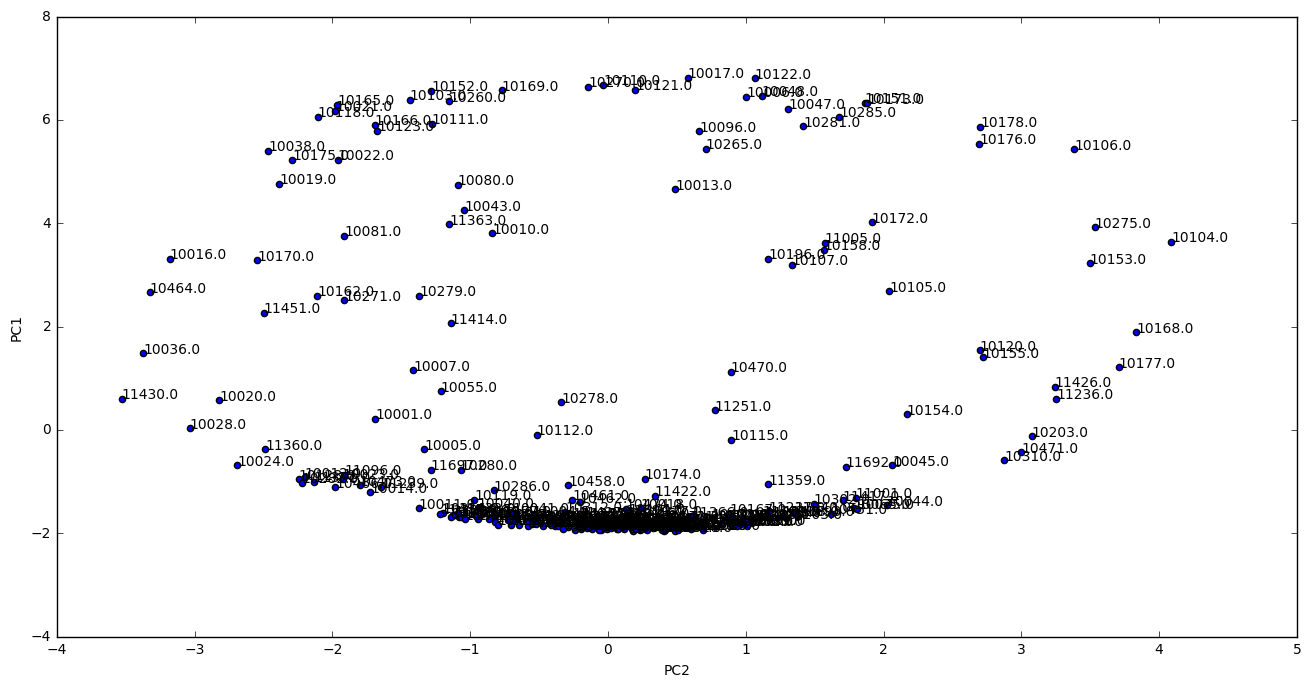

In [57]:
ax = existing_df_2d.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))

for i, country in enumerate(normed.index):
    ax.annotate(
        country, 
        (existing_df_2d.iloc[i].PC2, existing_df_2d.iloc[i].PC1)
    )

In [58]:
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit(normed)
existing_df_2d['cluster'] = pd.Series(clusters.labels_, index=existing_df_2d.index)
centroids = clusters.cluster_centers_

In [60]:
existing_df_2d.head()

,PC1,PC2,cluster
zip,,,
10001.0,0.211570,-1.689967,1
10002.0,-1.733828,-0.658795,4
10003.0,-1.802235,-0.117563,4
10004.0,-1.727577,0.089365,4
10005.0,-0.374806,-1.334768,1


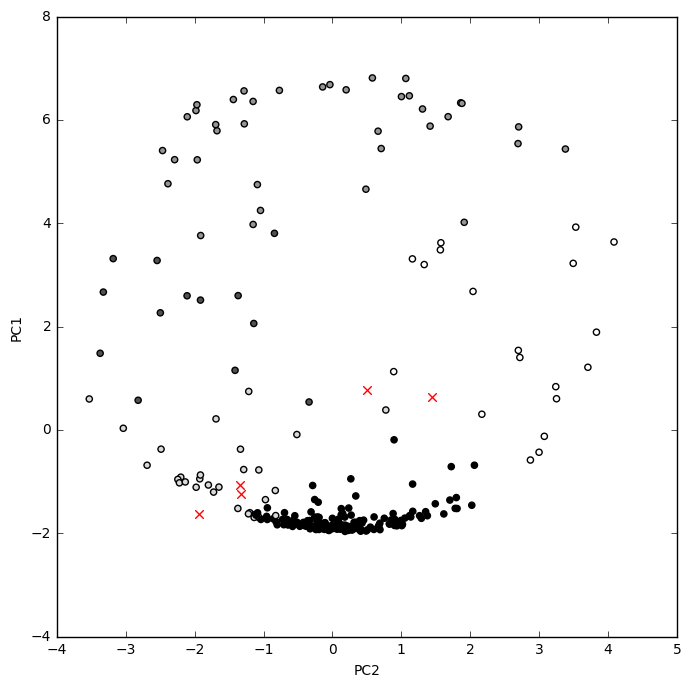

In [61]:
existing_df_2d.plot(
        kind='scatter',
        x='PC2',y='PC1',
        c=existing_df_2d.cluster.astype(np.float), 
        figsize=(8,8))

for x in centroids:
    pl.plot(centroids[:,0], centroids[:,1], 'rx')

### 5. overlay your data on a NYC map: you can use shapefiles for the zip codes and different colors for different clusters

In [62]:
shapes = gp.read_file(shapefile)

In [63]:
shapes.rename(columns = {'postalCode': 'zip'}, inplace=True)
shapes['zip'] = pd.to_numeric(shapes['zip'], errors = 'coerce')
shapes = shapes.set_index('zip')

In [64]:
shapes.head()

,@id,BLDGpostalCode,CTY_FIPS,OBJECTID,PO_NAME,STATE,ST_FIPS,Shape_Area,Shape_Leng,borough,geometry
zip,,,,,,,,,,,
11372,http://nyc.pediacities.com/Resource/PostalCode...,0,081,1,Jackson Heights,NY,36,2.016328e+07,20624.692317,Queens,POLYGON ((-73.86942457284175 40.74915687096787...
11004,http://nyc.pediacities.com/Resource/PostalCode...,0,081,2,Glen Oaks,NY,36,2.260653e+07,23002.816039,Queens,POLYGON ((-73.71068374074007 40.75004039450917...
11040,http://nyc.pediacities.com/Resource/PostalCode...,0,081,3,New Hyde Park,NY,36,6.269333e+06,15749.161511,Queens,POLYGON ((-73.70098278625547 40.73889569923034...
11426,http://nyc.pediacities.com/Resource/PostalCode...,0,081,4,Bellerose,NY,36,4.941836e+07,35932.810639,Queens,POLYGON ((-73.72270447144122 40.75373371438336...
11365,http://nyc.pediacities.com/Resource/PostalCode...,0,081,5,Fresh Meadows,NY,36,6.938587e+07,38693.565676,Queens,POLYGON ((-73.81088634744755 40.72717187575918...


In [65]:
#pd.merge(normed, shapes, left_index=True, right_index=True, how='left')
norm_shapes = pd.merge(normed, shapes, left_index='true', right_index='true', how='inner')
norm_shapes_clusters = pd.merge(norm_shapes, existing_df_2d, left_index='true', right_index='true', how='inner')
norm_shapes_clusters.columns

Index([           1994.0,            1995.0,            1996.0,
                  1997.0,            1998.0,            1999.0,
                  2000.0,            2001.0,            2002.0,
                  2003.0,            2004.0,            2005.0,
                  2006.0,            2007.0,            2008.0,
                  2009.0,            2010.0,            2011.0,
                  2012.0,            2013.0,            2014.0,
                  u'@id', u'BLDGpostalCode',       u'CTY_FIPS',
             u'OBJECTID',        u'PO_NAME',          u'STATE',
              u'ST_FIPS',     u'Shape_Area',     u'Shape_Leng',
              u'borough',       u'geometry',            u'PC1',
                  u'PC2',        u'cluster'],
      dtype='object', name=u'year')

In [66]:
geo_df = GeoDataFrame(norm_shapes_clusters, geometry=norm_shapes_clusters['geometry'])

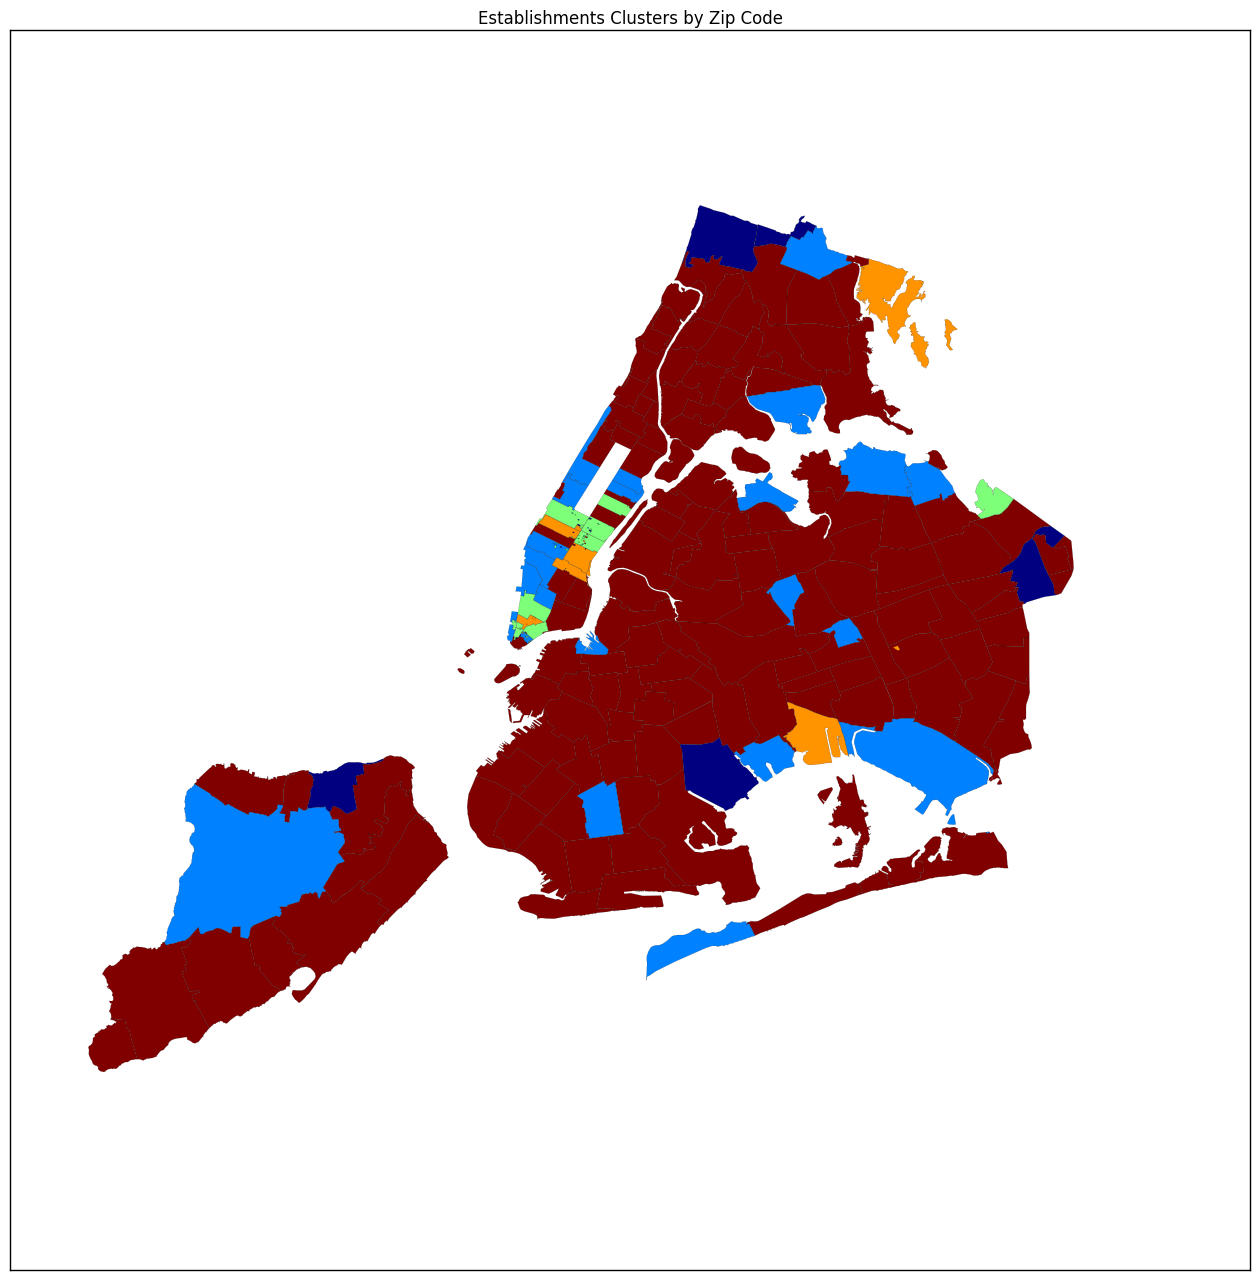

In [69]:
f, ax = plt.subplots(figsize=(16,16))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
geo_df.plot(column='cluster',alpha=1,linewidth=0.1,ax=ax)
plt.title("Establishments Clusters by Zip Code")
plt.legend()

### Use another clustering algorithm (of your choice)

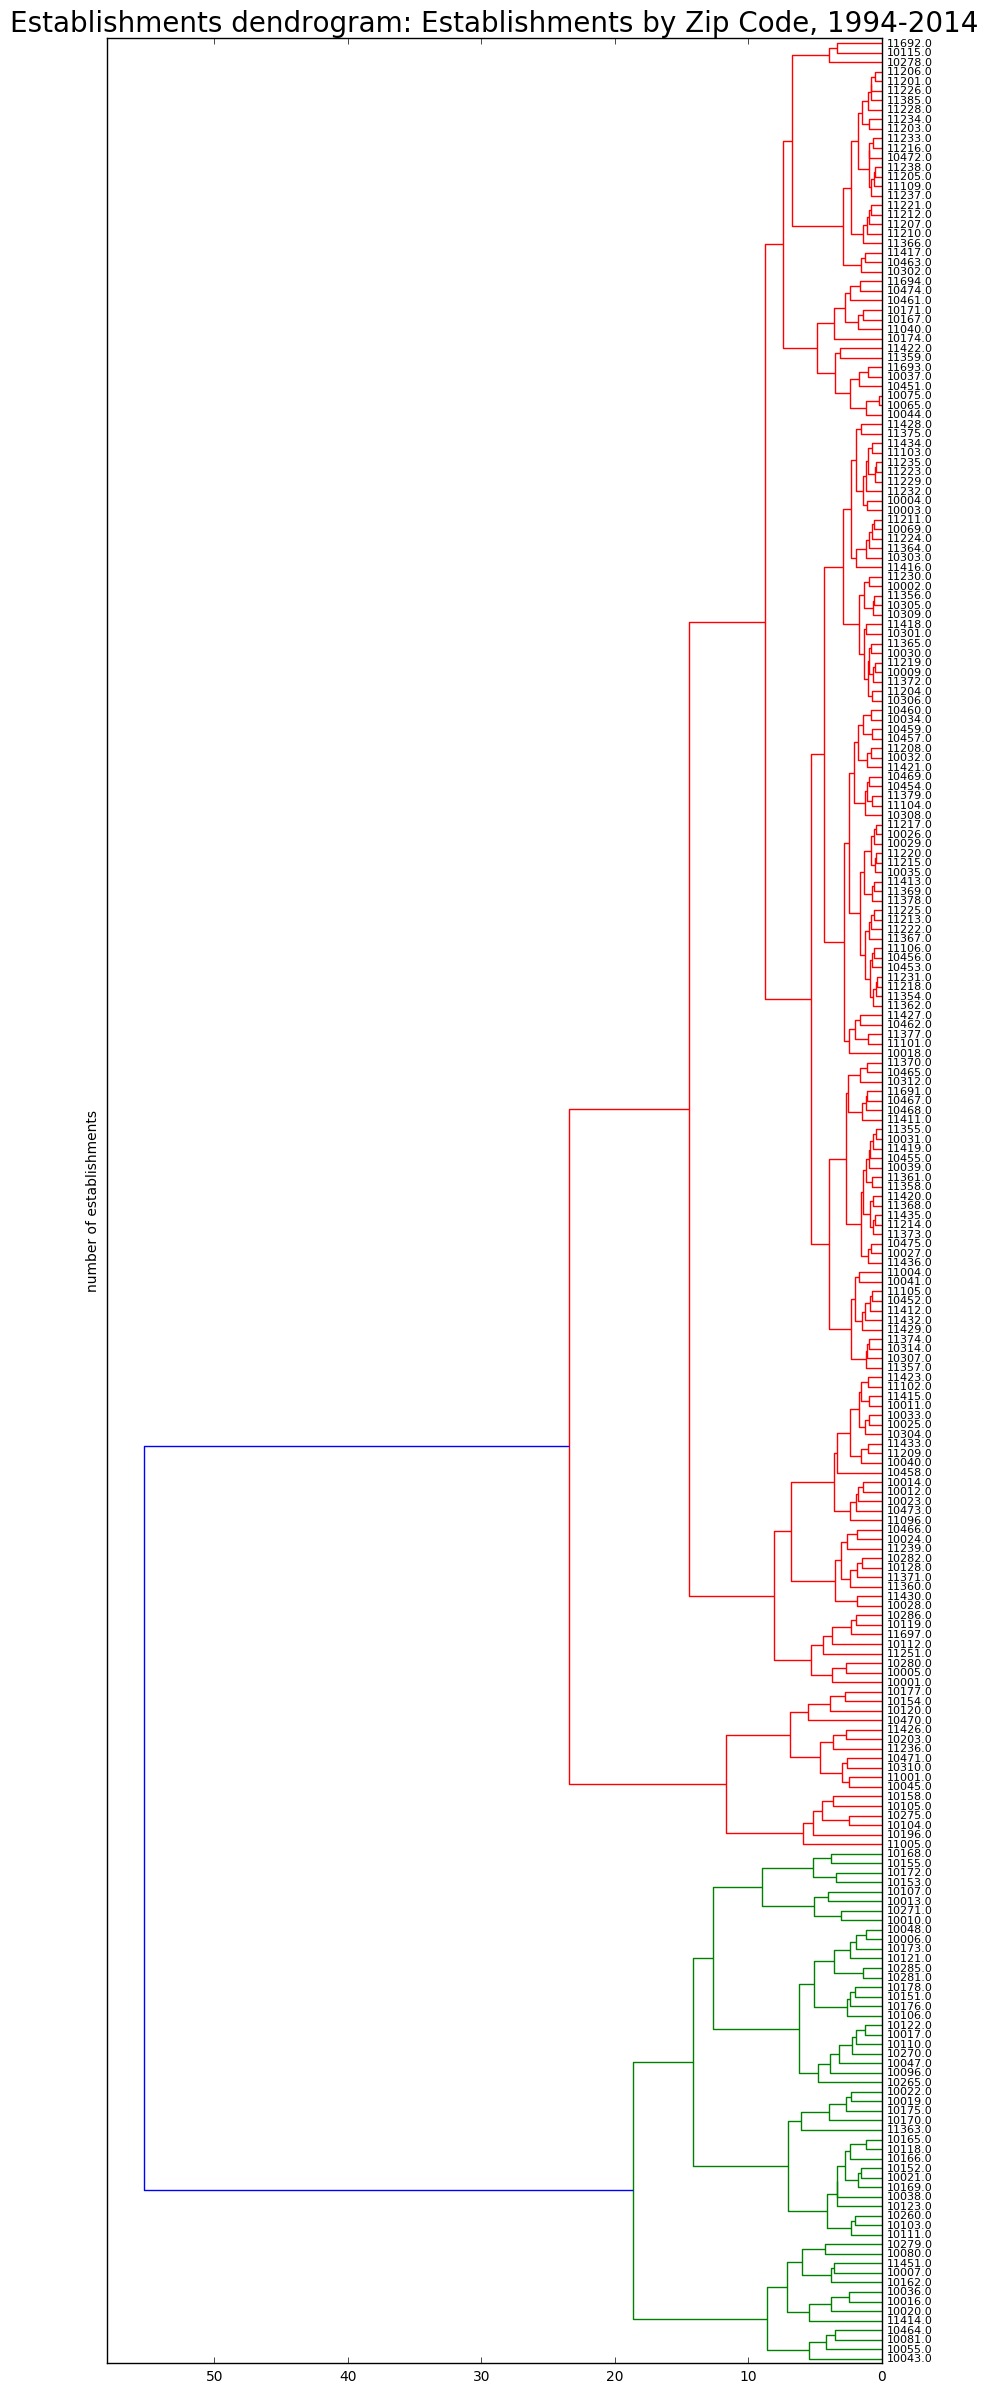

In [75]:
fig = pl.figure(figsize=(10,30), dpi=150)
pl.ylabel("number of establishments")
ddg = scp.hierarchy.dendrogram(scp.hierarchy.linkage(normed, method='ward'), orientation='left',
                               labels = normed.index.values,
                               #leaf_rotation=.,  # rotates the x axis labels
                               leaf_font_size=8.)  # font size for the x axis labels)
#pl.xticks(rotation=90)
pl.grid('off')
title = pl.title("Establishments dendrogram: Establishments by Zip Code, 1994-2014", fontsize=20)
#this is a dendrogram for inspection of the hierarchical structure

### 6. Compare the Results of the two algorithms
#### The map represents the result of k-means clustering and was based on 5 clusters. Most zipcodes are the same color and it represents the zipcodes with the least amount of businesses. Similarly, the first tree in the dendrogram breaks out the zipcodes with about 75% of the zipcodes in one cluster and 25% in another. I looked up several zipcodes from the dendrogram and the clusters match the colors on the map.

### 7. Interpretation
#### The interpretation I did based on the map matches what I know about NYC. The zipcodes with the highest number of businesses are found in midtown and the financial district as well as JFK airport and LaGuardia.